# Temas Tratados en el Trabajo Práctico 3

* Estrategias de búsqueda local.

* Algoritmos Evolutivos.

* Problemas de Satisfacción de Restricciones.

# Ejercicios Teóricos

1. ¿Qué mecanismo de detención presenta el algoritmo de Ascensión de Colinas? Describa el problema que puede presentar este mecanismo y cómo se llaman las áreas donde ocurren estos problemas.

El algoritmo de Ascensión de Colinas utiliza una meta-heurística que se basa en registar su estado actual y evaluar el valor de su función objetivo. Luego en base a ello, evalúa sus estados vecinos y siempre elige el que tenga un estado mejor que el actual(depende del criterio que se este siguiendo: maximizar/minimizar). De esta forma siempre sigue estados mejores que el actual sin importar que estados estén a continuación.
Este mecanismo puede presentar problemas o puede quedar deternido en su búsqueda si a partir de su ubicación actual no encuentra en sus vecinos más próximos un estado mejor que el que tiene. Esto ocurre en las zonas de máximos locales, ya que este punto es el mejor respecto a sus vecinos inmediatos, pero puede que no sea el máximo global, y el algoritmo de busqueda podría no salir de allí. 


2. Describa las distintas heurísticas que se emplean en un problema de Satisfacción de Restricciones.

### Heurísticas empleadas en Problemas de Satisacción de Restricciones
* Mayor Grado Heurístico: se eleige primero el nodo que tiene mayor cantidad de conexiones con sus nodos vecinos. Se priorizan las variables que afectan a otras, de manera de reducir el problema una vez que se le asigana un valor a esos nodos.
* Mínimos Valores Restantes(MRV): se detectan las variables que que tiene menos valores posibles disponibles en su dominio. Se intenta evitar que una variable se quede sin opciones de adoptar un valor permitido, para detectar fallos temprano y evitar expandir búsquedas inútiles.
* Valor Menos Restringido: de todos los valores posibles que puede adoptar una varibale, se elige aquel que no agregue tantas restricciones a su varibales vecinas. Se trata de se "amigable" con las varibles alrededor para mantener la mayor flexibilidad posible en el resto del problema, evitando bloqueos tempranos.

3. Se desea colorear el rompecabezas mostrado en la imagen con 7 colores distintos de manera que ninguna pieza tenga el mismo color que sus vecinas. Realice en una tabla el proceso de una búsqueda con Comprobación hacia Adelante empleando una heurística del Valor más Restringido.

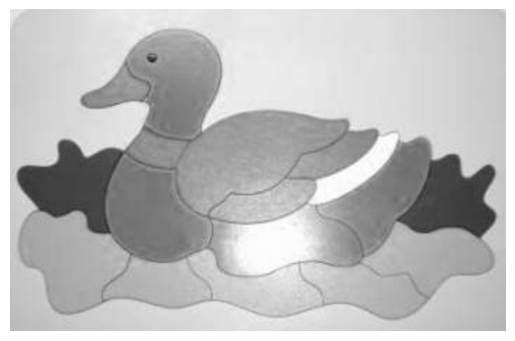

In [1]:
import requests
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

# URL directa de Google Drive
url = "https://drive.google.com/uc?export=view&id=1j94jFVxVG9y_ZnrMWOscQGb2MZ0Cdb3R"

# Descargar la imagen
response = requests.get(url)
img = Image.open(BytesIO(response.content))

# Mostrar la imagen
plt.imshow(img)
plt.axis('off')  # Ocultar ejes
plt.show()

* Conjunto de variables: (A,B,C,...Q)
* Dominio de valores posibles: {Rojo, Verde, Azul, Marrón, Negro, Blanco, Gris}
* Conjunto de restricciones: (A≠B, A≠C,...)


<img src="pato.png" width="250"/> <img src="patito.png" width="250"/>


**Tabla con procedimiento del algoritmo** 

![Tabla](tabla_pat.png)

# Ejercicios de Implementación

4. Encuentre el máximo de la función $f(x) = \frac{\sin(x)}{x + 0.1}$ en $x \in [-10; -6]$ con un error menor a $0.1$ utilizando el algoritmo _hill climbing_.

--- Resultado del Hill Climbing en el intervalo [-10, -6] ---
El máximo de la función f(x) es: 0.1299
Se encuentra en el punto: x = -7.7654


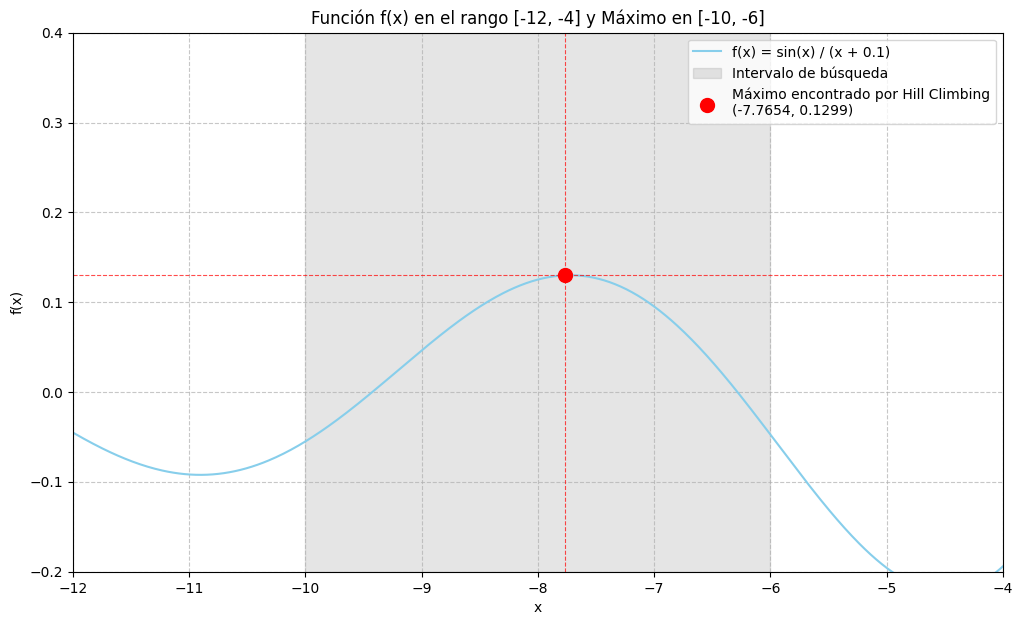

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    """
    Función a maximizar: f(x) = sin(x) / (x + 0.1)
    """
    if abs(x + 0.1) < 1e-9:
        return np.nan
    return np.sin(x) / (x + 0.1)

def hill_climbing(intervalo, error_minimo, paso, reinicios=50):
    """
    Implementación del algoritmo de hill climbing para maximización.
    """
    maximo_global_x = None
    maximo_global_f = -np.inf

    for _ in range(reinicios):
        x_actual = np.random.uniform(intervalo[0], intervalo[1])
        f_actual = f(x_actual)
        
        if np.isnan(f_actual):
            continue

        while True:
            vecinos = [x_actual - paso, x_actual + paso]
            vecinos_validos = [v for v in vecinos if intervalo[0] <= v <= intervalo[1]]
            
            if not vecinos_validos:
                break
            
            x_siguiente = max(vecinos_validos, key=f)
            f_siguiente = f(x_siguiente)

            if np.isnan(f_siguiente):
                break

            if f_siguiente > f_actual and abs(f_siguiente - f_actual) > error_minimo:
                x_actual = x_siguiente
                f_actual = f_siguiente
            else:
                break
        
        if f_actual > maximo_global_f and not np.isnan(f_actual):
            maximo_global_f = f_actual
            maximo_global_x = x_actual
            
    return maximo_global_x, maximo_global_f

# --- Configuración y Ejecución del Algoritmo ---
intervalo_busqueda = [-10, -6]
error_menor_a = 0.001
paso_de_busqueda = 0.01 
reinicios_hc = 100

x_max_hc, f_max_hc = hill_climbing(intervalo_busqueda, error_menor_a, paso_de_busqueda, reinicios=reinicios_hc)

print(f"--- Resultado del Hill Climbing en el intervalo {intervalo_busqueda} ---")
print(f"El máximo de la función f(x) es: {f_max_hc:.4f}")
print(f"Se encuentra en el punto: x = {x_max_hc:.4f}")

# --- Generación de la Gráfica ---
# Nuevo rango de graficación
rango_grafico = [-12, -4]
x_vals = np.linspace(rango_grafico[0], rango_grafico[1], 500)
y_vals = np.array([f(x) for x in x_vals])

plt.figure(figsize=(12, 7))
plt.plot(x_vals, y_vals, label='f(x) = sin(x) / (x + 0.1)', color='skyblue')

# Destacar el intervalo de búsqueda
plt.axvspan(intervalo_busqueda[0], intervalo_busqueda[1], color='gray', alpha=0.2, label='Intervalo de búsqueda')

# Marcar el punto máximo encontrado
if x_max_hc is not None:
    plt.scatter(x_max_hc, f_max_hc, color='red', s=100, zorder=5, label=f'Máximo encontrado por Hill Climbing\n({x_max_hc:.4f}, {f_max_hc:.4f})')
    plt.axvline(x=x_max_hc, color='red', linestyle='--', linewidth=0.8, alpha=0.7)
    plt.axhline(y=f_max_hc, color='red', linestyle='--', linewidth=0.8, alpha=0.7)

plt.title(f'Función f(x) en el rango {rango_grafico} y Máximo en {intervalo_busqueda}')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.xlim(rango_grafico[0], rango_grafico[1])
plt.ylim(ymin=-0.2, ymax=0.4) # Ajustar el rango del eje Y para mejor visualización
plt.show()

5. Diseñe e implemente un algoritmo de Recocido Simulado para que juegue contra usted al Ta-te-ti. Varíe los valores de temperatura inicial entre partidas, ¿qué diferencia observa cuando la temperatura es más alta con respecto a cuando la temperatura es más baja?

In [3]:
import random
import math
import numpy as np

class TaTeTiIA:
    def __init__(self, jugador='O'):
        self.jugador = jugador
        self.oponente = 'X' if jugador == 'O' else 'O'

    def obtener_celdas_vacias(self, tablero):
        return [(f, c) for f in range(3) for c in range(3) if tablero[f][c] == ' ']

    def verificar_ganador(self, tablero):
        for i in range(3):
            if tablero[i][0] == tablero[i][1] == tablero[i][2] != ' ': return tablero[i][0]
            if tablero[0][i] == tablero[1][i] == tablero[2][i] != ' ': return tablero[0][i]
        if tablero[0][0] == tablero[1][1] == tablero[2][2] != ' ': return tablero[0][0]
        if tablero[0][2] == tablero[1][1] == tablero[2][0] != ' ': return tablero[0][2]
        if not self.obtener_celdas_vacias(tablero): return 'Empate'
        return None

    def evaluar_tablero(self, tablero):
        ganador = self.verificar_ganador(tablero)
        if ganador == self.jugador:
            return -10000
        if ganador == self.oponente:
            return 10000
        if ganador == 'Empate':
            return 0

        puntuacion_ia = 0
        puntuacion_oponente = 0

        lineas = [
            [(0,0),(0,1),(0,2)], [(1,0),(1,1),(1,2)], [(2,0),(2,1),(2,2)],
            [(0,0),(1,0),(2,0)], [(0,1),(1,1),(2,1)], [(0,2),(1,2),(2,2)],
            [(0,0),(1,1),(2,2)], [(0,2),(1,1),(2,0)]
        ]

        for linea in lineas:
            contador_ia = sum(1 for f, c in linea if tablero[f][c] == self.jugador)
            contador_oponente = sum(1 for f, c in linea if tablero[f][c] == self.oponente)
            contador_vacio = sum(1 for f, c in linea if tablero[f][c] == ' ')

            if contador_ia == 2 and contador_vacio == 1:
                puntuacion_ia += 100
            if contador_oponente == 2 and contador_vacio == 1:
                puntuacion_oponente += 1000
            if contador_ia == 1 and contador_vacio == 2:
                puntuacion_ia += 10
            if contador_oponente == 1 and contador_vacio == 2:
                puntuacion_oponente += 10

        return puntuacion_oponente - puntuacion_ia

    def movimiento_recocido_simulado(self, tablero, temperatura):
        celdas_vacias = self.obtener_celdas_vacias(tablero)
        if not celdas_vacias:
            return None

        movimiento_actual = random.choice(celdas_vacias)
        
        for _ in range(200):
            movimiento_vecino = random.choice(celdas_vacias)
            
            tablero_actual = [fila[:] for fila in tablero]
            tablero_actual[movimiento_actual[0]][movimiento_actual[1]] = self.jugador
            
            tablero_vecino = [fila[:] for fila in tablero]
            tablero_vecino[movimiento_vecino[0]][movimiento_vecino[1]] = self.jugador

            costo_actual = self.evaluar_tablero(tablero_actual)
            costo_vecino = self.evaluar_tablero(tablero_vecino)

            delta_costo = costo_vecino - costo_actual
            
            if delta_costo < 0:
                movimiento_actual = movimiento_vecino
            else:
                if temperatura > 0 and random.uniform(0, 1) < math.exp(-delta_costo / temperatura):
                    movimiento_actual = movimiento_vecino
        
        return movimiento_actual

def imprimir_tablero(tablero):
    print("-------------")
    for fila in tablero:
        print(f"| {' | '.join(fila)} |")
        print("-------------")

def jugar_partida():
    tablero = [[' ' for _ in range(3)] for _ in range(3)]

    print("¡Bienvenido al Ta-te-ti!")
    
    # Nuevo: Primero solicita la temperatura
    try:
        temp_inicial = float(input("Elige una temperatura inicial para la IA (100 = explorativa, 1 = codiciosa): "))
    except ValueError:
        print("Entrada inválida. Usando la temperatura predeterminada de 50.")
        temp_inicial = 50

    temp_actual = temp_inicial
    tasa_enfriamiento = 0.95 

    # Nuevo: Luego solicita la ficha para decidir el turno
    while True:
        eleccion = input("¿Con qué ficha quieres jugar? ('X' para empezar o 'O' para que empiece la IA): ").upper()
        if eleccion in ['X', 'O']:
            turno_jugador = (eleccion == 'X')
            ia = TaTeTiIA(jugador='O' if eleccion == 'X' else 'X')
            break
        else:
            print("Opción inválida. Por favor, elige 'X' o 'O'.")

    imprimir_tablero(tablero)

    while True:
        if turno_jugador:
            try:
                print(f"Tu turno ('{eleccion}').")
                fila = int(input("Ingresa la fila (0-2): "))
                columna = int(input("Ingresa la columna (0-2): "))
                if tablero[fila][columna] == ' ':
                    tablero[fila][columna] = eleccion
                    turno_jugador = False
                else:
                    print("Esa celda ya está ocupada. Intenta de nuevo.")
                    continue
            except (ValueError, IndexError):
                print("Entrada inválida. Intenta de nuevo.")
                continue
        else:
            print("Turno de la IA...")
            movimiento_ia = ia.movimiento_recocido_simulado(tablero, temp_actual)
            if movimiento_ia:
                tablero[movimiento_ia[0]][movimiento_ia[1]] = ia.jugador
            turno_jugador = True

        imprimir_tablero(tablero)
        
        ganador = ia.verificar_ganador(tablero)
        if ganador:
            if ganador == eleccion:
                print("¡Has ganado!")
            elif ganador == ia.jugador:
                print("¡La IA ha ganado!")
            else:
                print("¡Es un empate!")
            break

        temp_actual *= tasa_enfriamiento

if __name__ == "__main__":
    jugar_partida()

¡Bienvenido al Ta-te-ti!
-------------
|   |   |   |
-------------
|   |   |   |
-------------
|   |   |   |
-------------
Tu turno ('X').
-------------
|   |   |   |
-------------
|   | X |   |
-------------
|   |   |   |
-------------
Turno de la IA...
-------------
| O |   |   |
-------------
|   | X |   |
-------------
|   |   |   |
-------------
Tu turno ('X').
-------------
| O |   | X |
-------------
|   | X |   |
-------------
|   |   |   |
-------------
Turno de la IA...
-------------
| O |   | X |
-------------
|   | X |   |
-------------
| O |   |   |
-------------
Tu turno ('X').
-------------
| O |   | X |
-------------
| X | X |   |
-------------
| O |   |   |
-------------
Turno de la IA...
-------------
| O |   | X |
-------------
| X | X | O |
-------------
| O |   |   |
-------------
Tu turno ('X').
Esa celda ya está ocupada. Intenta de nuevo.
Tu turno ('X').
-------------
| O |   | X |
-------------
| X | X | O |
-------------
| O | X |   |
-------------
Turno de la 


6. Diseñe e implemente un algoritmo genético para cargar una grúa con $n=10\;cajas$ que puede soportar un peso máximo $C=1000\;kg$. Cada caja *j* tiene asociado un precio $p_j$ y un peso $w_j$ como se indica en la tabla de abajo, de manera que el algoritmo debe ser capaz de maximizar el precio sin superar el límite de carga.

<table><tr><td>Elemento ($j$)</td><td>1</td><td>2</td><td>3</td><td>4</td><td>5</td><td>6</td><td>7</td><td>8</td><td>9</td><td>10</td></tr>

<tr><td>Precio ($p_j$)</td><td>100</td><td>50</td><td>115</td><td>25</td><td>200</td><td>30</td><td>40</td><td>100</td><td>100</td><td>100</td></tr>

<tr><td>Peso ($w_j$)</td><td>300</td><td>200</td><td>450</td><td>145</td><td>664</td><td>90</td><td>150</td><td>355</td><td>401</td><td>395</td></tr></table><br>

        6.1 En primer lugar, es necesario representar qué cajas estarán cargadas en la grúa y cuáles no. Esta representación corresponde a un Individuo con el que trabajará el algoritmo.

        6.2 A continuación, genere una Población que contenga un número $N$ de individuos (se recomienda elegir un número par). Es necesario crear un control que verifique que ninguno de los individuos supere el peso límite.

        6.3 Cree ahora una función que permita evaluar la Idoneidad de cada individuo y seleccione $N/2$ parejas usando el método de la ruleta.

        6.4 Por último, Cruce las parejas elegidas, aplique un mecanismo de Mutación y verifique que los individuos de la nueva población no superen el límite de peso.

        6.5 Realice este proceso iterativamente hasta que se cumpla el mecanismo de detención de su elección y muestre el mejor individuo obtenido junto con el peso y el precio que alcanza.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from typing import Dict, List, Set, Tuple, Optional
import random

In [5]:
"""
Definición de la clase Caja.
Representa cada caja individual con sus propiedades: id, peso y valor.
"""
class Caja:
    def __init__(self, id: int, peso: float, valor: float):
        self.id = id
        self.peso = peso
        self.valor = valor
    
    def __str__(self):
        return f"Caja(id={self.id}, Peso={self.peso}, Valor={self.valor})"

In [6]:
"""
Definicion de la clase Individuo
Representa una solución potencial al problema de la mochila.
"""
class Individuo:
    def __init__(self, cromosoma: List[bool], cajas: List[Caja]):
        self.cromosoma = cromosoma # Representa la selección de cajas (True = seleccionada, False = no seleccionada)
        self.cajas = cajas
        self.peso_total = self._calcular_peso()
        self.fitness = self._calcular_fitness(self.peso_total)
    
    def _calcular_peso(self) -> float:
        "Calcula el peso total de las cajas seleccionadas en el cromosoma."
        return sum(self.cajas[i].peso for i, seleccionado in enumerate(self.cromosoma) if seleccionado)
    
    def _calcular_fitness(self, peso_total: float) -> float:
        "Calcula el fitness del individuo basado en el peso y el valor total de las cajas"
        # Penalizacion si el peso total excede el maximo
        if peso_total > 1000:
            return 0
        # Calcula el valor total solo si el peso es válido
        return sum(self.cajas[i].valor for i, seleccionada in enumerate(self.cromosoma) if seleccionada)
    
    def actualizar_despues_mutacion(self):
        """Método para actualizar peso y fitness después de una mutación"""
        self.peso_total = self._calcular_peso()
        self.fitness = self._calcular_fitness(self.peso_total)
    
    def __str__(self):
        return f"Individuo(Cromosoma={self.cromosoma}, Fitness={self.fitness})"

In [7]:
"""
Definición de la clase Poblacion.
Maneja un conjunto de individuos y las operaciones genéticas sobre ellos.
"""
class Poblacion:
    """
    Inicializa una población de individuos.
    
    Parametros:
        tamano: Número de individuos en la población.
        cajas: Lista de cajas disponibles.
        inicializar: Si es True, genera individuos aleatorios.
    """
    def __init__(self, tamano: int, cajas: List[Caja], inicializar: bool = True):
        self.individuos = []
        self.cajas = cajas

        if inicializar:
            for _ in range(tamano):
                cromosoma = [np.random.choice([True, False]) for _ in range(len(cajas))]
                individuo = Individuo(cromosoma, cajas)
                self.individuos.append(individuo)
    
    def obtener_mejor_individuo(self) -> Individuo:
        return max(self.individuos, key=lambda ind: ind.fitness)
        
    def tamano(self) -> int:
        return len(self.individuos)

In [8]:
"""
Definición de la clase AlgoritmoGenetico.
"""
class AlgoritmoGenetico:
    """
    Inicializa el algoritmo genético con los parámetros dados.

    Parametros:
        tamano_poblacion: Número de individuos en la población.
        tasa_mutacion: Probabilidad de mutación para cada gen.
        tasa_cruce: Probabilidad de cruce entre dos individuos.
        cajas: Lista de cajas disponibles.
        elitismo: Si es True, conserva el mejor individuo en cada generación.
    """
    def __init__(self, tamano_poblacion: int, tasa_mutacion: float, tasa_cruce: float,
                 cajas: List[Caja], elitismo: bool = True):
        self.tamano_poblacion = tamano_poblacion
        self.tasa_mutacion = tasa_mutacion
        self.tasa_cruce = tasa_cruce
        self.cajas = cajas
        self.elitismo = elitismo
        self.historial_fitness = []  # Para almacenar el mejor fitness de cada generación

    def ejecutar(self, generaciones: int) -> Individuo:
        """
        Ejecuta el algoritmo genetico para encontrar la mejor solucion.

        Argumentos:
            generaciones (int): Numero de generaciones a evolucionar.

        Retorna:
            Individuo: El mejor individuo encontrado tras todas las generaciones.
        """
        # Inicializacion. Crear población inicial aleatoria
        poblacion = Poblacion(self.tamano_poblacion, self.cajas)
        mejor_global = poblacion.obtener_mejor_individuo()

        # Evolución de la población un numero determinado de generaciones
        for generacion in range (generaciones):
            nueva_poblacion = []

            # Elitismo: conservar el mejor individuo de la generación actual
            if self.elitismo:
                nueva_poblacion.append(mejor_global)

            # Crear nueva poblacion
            while len(nueva_poblacion) < self.tamano_poblacion:
                # Selección de padres
                padre1 = self.seleccionar(poblacion)
                padre2 = self.seleccionar(poblacion)

                # Cruzamiento
                # Con cierta probabilidad, cruza los padres para crear dos hijos
                if random.random() < self.tasa_cruce:
                    hijo1, hijo2 = self.cruzar(padre1, padre2)
                else:
                    hijo1, hijo2 = padre1, padre2

                # Mutación
                self.mutar(hijo1)
                self.mutar(hijo2)

                nueva_poblacion.extend([hijo1, hijo2])

            # Ajusta tamanio si es necesario
            poblacion.individuos = nueva_poblacion[:self.tamano_poblacion]

            # Actualizar el mejor individuo global
            mejor_actual = poblacion.obtener_mejor_individuo()
            if mejor_actual.fitness > mejor_global.fitness:
                mejor_global = mejor_actual

            # Guardar el mejor fitness de la generación actual
            self.historial_fitness.append(mejor_global.fitness)
                
            # Seguimiento de progreso
            if generacion % 10 == 0:
                print(f"Generacion {generacion}: Mejor Fitness = {mejor_global.fitness}")
            
        return mejor_global
    
    def seleccionar(self, poblacion: Poblacion) -> Individuo:
        """
        Seleccionar un individuo de la poblacion utilizando el metodo de la ruleta.
        
        Parametros:
            poblacion (Poblacion): La poblacion de la cual seleccionar.

        Retorna:
            Individuo: El individuo seleccionado para ser un padre.
        """

        # Calcular el fitnes total de la poblacion
        total_fitness = sum(ind.fitness for ind in poblacion.individuos)

        # Manejo de caso especial donde todos los fitness son cero
        if total_fitness == 0:
            return random.choice(poblacion.individuos)
        
        # Genera un punto aleatorio en la ruleta
        punto_ruleta = random.uniform(0, total_fitness)
        fitness_acumulado = 0
        
        # Recorre los individuos y selecciona el que corresponde al punto de la ruleta
        for individuo in poblacion.individuos:
            fitness_acumulado += individuo.fitness
            if fitness_acumulado >= punto_ruleta:
                return individuo
            
        return poblacion.individuos[-1]

    def cruzar(self, padre1: Individuo, padre2: Individuo) -> Tuple[Individuo, Individuo]:
        """
        Realiza el cruce de un solo punto entre 2 padres para crear 2 hijos.

        Argumentos:
            padre1 (Individuo): El primer padre.
            padre2 (Individuo): El segundo padre.

        Retorna:
            Tuple[Individuo, Individuo]: Los dos hijos resultantes del cruce.
        """

        # Elegir un punto de cruce aleatorio
        punto_cruce = random.randint(1, len(self.cajas) - 1)
        
        # Realizar el cruce
        cromosoma_hijo1 = padre1.cromosoma[:punto_cruce] + padre2.cromosoma[punto_cruce:]
        cromosoma_hijo2 = padre2.cromosoma[:punto_cruce] + padre1.cromosoma[punto_cruce:]
        
        # Crear nuevas instancias de Individuo para los hijos
        hijo1 = Individuo(cromosoma_hijo1, self.cajas)
        hijo2 = Individuo(cromosoma_hijo2, self.cajas)
        
        # Retornar los hijos
        return hijo1, hijo2

    def mutar(self, individuo: Individuo) -> None:
        """
        Aplica la mutación de bit flip al individuo dado.

        Argumentos:
            individuo (Individuo): El individuo a mutar.
        """
        
        # Recorrer cada gen(bit) en el cromosoma
        for i in range(len(individuo.cromosoma)):
            # Decidir si mutar el gen actual
            if random.random() < self.tasa_mutacion:
                # Aplicar mutación (bit flip)
                individuo.cromosoma[i] = not individuo.cromosoma[i]
        
        # Recalcular fitness después de la mutación
        individuo.actualizar_despues_mutacion()

    def graficar_evolucion(self):
        """Genera una gráfica de la evolución del fitness a lo largo de las generaciones"""
        plt.figure(figsize=(10, 6))
        plt.plot(self.historial_fitness)
        plt.title('Evolución del Fitness')
        plt.xlabel('Generación')
        plt.ylabel('Mejor Fitness')
        plt.grid(True)
        plt.show()

=== INFORMACIÓN DE LAS CAJAS ===
Caja(id=1, Peso=300, Valor=100)
Caja(id=2, Peso=200, Valor=50)
Caja(id=3, Peso=450, Valor=115)
Caja(id=4, Peso=145, Valor=25)
Caja(id=5, Peso=664, Valor=200)
Caja(id=6, Peso=90, Valor=30)
Caja(id=7, Peso=150, Valor=40)
Caja(id=8, Peso=355, Valor=100)
Caja(id=9, Peso=401, Valor=100)
Caja(id=10, Peso=395, Valor=100)
Peso máximo permitido: 1000 kg

=== EJECUTANDO ALGORITMO GENÉTICO ===
Generacion 0: Mejor Fitness = 270
Generacion 10: Mejor Fitness = 280
Generacion 20: Mejor Fitness = 300
Generacion 30: Mejor Fitness = 300
Generacion 40: Mejor Fitness = 300
Generacion 50: Mejor Fitness = 300
Generacion 60: Mejor Fitness = 300
Generacion 70: Mejor Fitness = 300
Generacion 80: Mejor Fitness = 300
Generacion 90: Mejor Fitness = 300

=== RESULTADOS ===
Mejor solución encontrada: Fitness = 300
Peso total: 964 kg
Valor total: $300

Cajas seleccionadas:
  - Caja(id=1, Peso=300, Valor=100)
  - Caja(id=5, Peso=664, Valor=200)


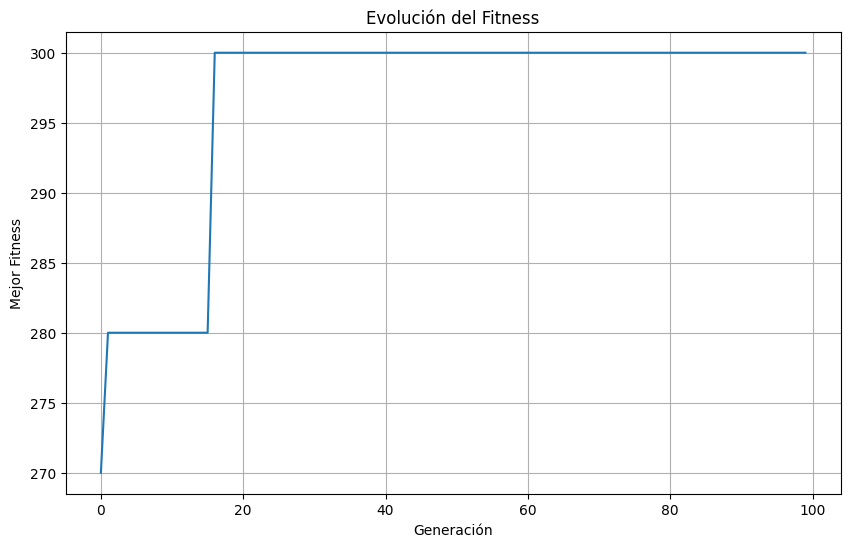

In [15]:
# Script principal
def main():
    # Crear las cajas según los datos proporcionados
    pesos = [300, 200, 450, 145, 664, 90, 150, 355, 401, 395]
    valores = [100, 50, 115, 25, 200, 30, 40, 100, 100, 100]
    
    cajas = []
    for i in range(10):
        cajas.append(Caja(i+1, pesos[i], valores[i]))
    
    # Mostrar información de las cajas
    print("=== INFORMACIÓN DE LAS CAJAS ===")
    for caja in cajas:
        print(caja)
        
    print(f"Peso máximo permitido: 1000 kg\n")
    
    # Configurar y ejecutar el algoritmo genético
    ag = AlgoritmoGenetico(
        tamano_poblacion=200,
        tasa_mutacion=0.01,
        tasa_cruce=0.9,
        cajas=cajas,
        elitismo=True
    )
    
    print("=== EJECUTANDO ALGORITMO GENÉTICO ===")
    mejor_solucion = ag.ejecutar(generaciones=100)
    
    # Mostrar resultados
    print("\n=== RESULTADOS ===")
    print(f"Mejor solución encontrada: Fitness = {mejor_solucion.fitness}")
    
    # Calcular peso total y valor total
    peso_total = 0
    valor_total = 0
    cajas_seleccionadas = []
    
    for i, seleccionada in enumerate(mejor_solucion.cromosoma):
        if seleccionada:
            peso_total += cajas[i].peso
            valor_total += cajas[i].valor
            cajas_seleccionadas.append(cajas[i])
    
    print(f"Peso total: {peso_total} kg")
    print(f"Valor total: ${valor_total}")
    
    print("\nCajas seleccionadas:")
    for caja in cajas_seleccionadas:
        print(f"  - {caja}")
    
    # Mostrar gráfica de evolución
    ag.graficar_evolucion()

if __name__ == "__main__":
    main()

# Bibliografía

[Russell, S. & Norvig, P. (2004) _Inteligencia Artificial: Un Enfoque Moderno_. Pearson Educación S.A. (2a Ed.) Madrid, España](https://www.academia.edu/8241613/Inteligencia_Aritificial_Un_Enfoque_Moderno_2da_Edici%C3%B3n_Stuart_J_Russell_y_Peter_Norvig)

[Poole, D. & Mackworth, A. (2023) _Artificial Intelligence: Foundations of Computational Agents_. Cambridge University Press (3a Ed.) Vancouver, Canada](https://artint.info/3e/html/ArtInt3e.html)